### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Dataset

In [2]:
PATH = "../Data/"
xl = pd.ExcelFile("../Data/CallStrat.xlsx")

In [3]:
xl.sheet_names

['Agent Scorecard', 'CallTypeNames', 'Scorecard', 'Stratification']

In [4]:
DF_MONITORING = pd.read_excel(PATH + "CallStrat.xlsx",
                             sheet_name="Agent Scorecard")

DF_CALLTYPES = pd.read_excel(PATH + "CallStrat.xlsx",
                             sheet_name="CallTypeNames")

DF_SCORECARDS = pd.read_excel(PATH + "CallStrat.xlsx",
                              sheet_name="Scorecard")

DF_STRATIFICATION = pd.read_excel(PATH + "CallStrat.xlsx",
                                  sheet_name="Stratification")

#### NOTE:

- DF_MONITORING: Monitoring Template
- DF_CALL/TYPES: Call Types
- DF_SCORECARDS: Different Scorecards from different accounts
- DF_STRATIFICATION: Call Stratification

In [370]:
DF_MONITORING.head()

,AgentScorecardID,ScoreCardID,EmployeeNo,AccountName,LOBName,TotalTenureDays,CSAT,QAScore,CallMaturity,QAEvaluation,Scorable,Autofail,CallTypeID,CallType
0,15099,147,10703001,Ally CS,Voice,1154,-1,100.0,-1.0,Pass,1,0,532,532
1,15142,147,10028543,Ally CS,Voice,3786,-1,100.0,-1.0,Pass,0,0,532,532
2,15491,147,10717356,Ally CS,Voice,765,-1,100.0,-1.0,Pass,0,0,532,532
3,15492,147,10710300,Ally CS,Voice,940,-1,100.0,-1.0,Pass,0,0,532,532
4,15495,147,10701105,Ally CS,Voice,1199,-1,100.0,-1.0,Pass,0,0,532,532


In [371]:
DF_STRATIFICATION.head()

,AgentScorecardID,EmployeeNo,ScorecardID,Activity Name,StartTime,EndTime,Duration,CountVar,CreatedDate,ActivityOrder
0,32303,10738698,159,Opening,00:00:00,00:00:00,0,1,2020-01-03 02:46:00,1
1,32340,10688225,159,Opening,00:00:00,00:00:00,0,1,2020-01-03 04:56:04,1
2,32470,10726949,159,Opening,00:00:00,00:00:00,0,1,2020-01-04 00:29:21,1
3,32612,10731968,159,Opening,00:00:00,00:00:00,0,1,2020-01-05 03:23:13,1
4,32816,10738610,159,Opening,00:00:00,00:00:00,0,1,2020-01-07 04:33:19,1


In [372]:
DF_SCORECARDS.head()

,ScorecardID,ScorecardName,DateCreated,Active
0,3,Macquarie BFS Cards and TSA 2019,2019-01-30 17:48:56.666,False
1,4,MCQ Leasing CSS,2019-01-30 18:15:51.260,False
2,5,Citi APAC,2019-01-30 18:22:38.763,False
3,8,Zoosk CS Scorecard,2019-02-12 05:03:55.350,False
4,9,Zoosk CS QA Scorecard,2019-02-12 20:19:49.123,False


In [373]:
DF_CALLTYPES.head()

,CallTypeID,CallTypeName
0,1,Dragon - Questions and Presales
1,2,Dragon - Downloads
2,3,Dragon - Activation
3,4,Dragon - Dictation/ Integration
4,5,Dragon - Application


#### Getting the scorecard names

In [374]:
DF_STRATIFICATION = DF_STRATIFICATION.merge(DF_SCORECARDS.drop(columns=["DateCreated"]),
                                            on="ScorecardID"
                                           )

#### Getting the transaction monitorings

In [375]:
DF_STRATIFICATION = DF_STRATIFICATION.merge(DF_MONITORING[["AgentScorecardID", "CSAT", "TotalTenureDays",
                                                          "CallMaturity", "QAEvaluation", "Autofail", "CallTypeID"
                                                         ]],
                                            on="AgentScorecardID"
                                           )

#### Getting the Call Types

In [376]:
DF_STRATIFICATION = DF_STRATIFICATION.merge(DF_CALLTYPES, on="CallTypeID")

#### Dropping some columns

In [377]:
DF_STRATIFICATION = DF_STRATIFICATION.drop(columns=["EmployeeNo",
                                                    "ScorecardID",
                                                    "CallTypeID"
                                                   ])

In [378]:
DF_STRATIFICATION

,AgentScorecardID,Activity Name,StartTime,EndTime,Duration,CountVar,CreatedDate,ActivityOrder,ScorecardName,Active,CSAT,TotalTenureDays,CallMaturity,QAEvaluation,Autofail,CallTypeName
0,32303,Opening,00:00:00,00:00:00,0,1,2020-01-03 02:46:00,1,NEW - Phone/Chat Scorecard,True,-1,131,2.0,Pass,0,Pending/deny account modify
1,32303,Chatbot,00:00:00,00:02:16,136,1,2020-01-03 02:46:00,2,NEW - Phone/Chat Scorecard,True,-1,131,2.0,Pass,0,Pending/deny account modify
2,32303,Transaction Close,00:26:20,00:27:12,52,1,2020-01-03 02:46:00,8,NEW - Phone/Chat Scorecard,True,-1,131,2.0,Pass,0,Pending/deny account modify
3,32303,Resolution,00:20:50,00:26:20,330,1,2020-01-03 02:46:00,7,NEW - Phone/Chat Scorecard,True,-1,131,2.0,Pass,0,Pending/deny account modify
4,32303,(while On Hold) Troubleshooting,00:12:50,00:15:07,137,1,2020-01-03 02:46:00,5,NEW - Phone/Chat Scorecard,True,-1,131,2.0,Pass,0,Pending/deny account modify
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63728,46127,Call Agenda,00:01:05,00:01:19,14,1,2020-04-03 02:52:38,3,Lifescan Global Scorecard v3,True,-1,327,2.0,Pass,0,Inquiry
63729,46127,Acknowledgement,00:00:43,00:01:05,22,1,2020-04-03 02:52:38,2,Lifescan Global Scorecard v3,True,-1,327,2.0,Pass,0,Inquiry
63730,46127,Resolution,00:10:39,00:12:05,86,2,2020-04-03 02:52:38,9,Lifescan Global Scorecard v3,True,-1,327,2.0,Pass,0,Inquiry
63731,46127,Hold,00:08:35,00:10:39,124,2,2020-04-03 02:52:38,8,Lifescan Global Scorecard v3,True,-1,327,2.0,Pass,0,Inquiry


In [379]:
DF_STRATIFICATION = DF_STRATIFICATION[DF_STRATIFICATION["ScorecardName"].str.lower().str.contains("ally")].reset_index(drop=True)

In [380]:
DF_STRATIFICATION

,AgentScorecardID,Activity Name,StartTime,EndTime,Duration,CountVar,CreatedDate,ActivityOrder,ScorecardName,Active,CSAT,TotalTenureDays,CallMaturity,QAEvaluation,Autofail,CallTypeName
0,46490,Opening,00:00:00,00:00:07,7,1,2020-04-23 23:28:30,1,Ally Care V-02-2020,True,3,158,2.0,Fail,0,Payments - NH
1,46490,Provide Necessary Information/Answers questions,00:02:31,00:02:44,13,1,2020-04-23 23:28:30,8,Ally Care V-02-2020,True,3,158,2.0,Fail,0,Payments - NH
2,46490,Closing,00:03:46,00:03:49,3,1,2020-04-23 23:28:30,17,Ally Care V-02-2020,True,3,158,2.0,Fail,0,Payments - NH
3,46490,Acknowledgement,00:02:22,00:02:26,4,1,2020-04-23 23:28:30,5,Ally Care V-02-2020,True,3,158,2.0,Fail,0,Payments - NH
4,46490,Agenda/Concern,00:02:19,00:02:22,3,1,2020-04-23 23:28:30,4,Ally Care V-02-2020,True,3,158,2.0,Fail,0,Payments - NH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16280,43614,Verification,00:01:39,00:04:11,152,2,2020-03-06 01:12:45,6,Ally Care V-01-2020,True,3,145,1.0,Fail,0,Insurance - NH
16281,43614,Agenda/Customer concern,00:07:23,00:07:23,0,2,2020-03-06 01:12:45,10,Ally Care V-01-2020,True,3,145,1.0,Fail,0,Insurance - NH
16282,43614,Provide Necessary Information/Answers questions,00:04:48,00:07:23,155,2,2020-03-06 01:12:45,9,Ally Care V-01-2020,True,3,145,1.0,Fail,0,Insurance - NH
16283,43614,Verification,00:07:23,00:10:27,184,3,2020-03-06 01:12:45,11,Ally Care V-01-2020,True,3,145,1.0,Fail,0,Insurance - NH


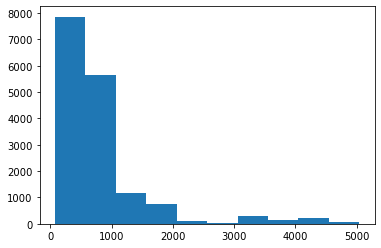

In [381]:
DF_STRATIFICATION["TotalTenureDays"].hist(grid=False);

In [382]:
DF_STRATIFICATION["TotalTenureDays"].min()

74

In [383]:
def get_tenure(pandas_series):

    the_list = []
    for a in pandas_series:
        if a <= 30:
            the_list.append("<= 30 Days")
        elif a<= 60:
            the_list.append("<= 60 Days")
        elif a<= 90:
            the_list.append("<= 90 Days")
        elif a<= 180:
            the_list.append("<= 180 Days")
        elif a<= 365:
            the_list.append("<= 365 Days")
        else:
            the_list.append("> 365 Days")
            
    return pd.Series(the_list)

In [384]:
DF_STRATIFICATION["Tenure_Bin"] = get_tenure(DF_STRATIFICATION["TotalTenureDays"])

In [385]:
DF_STRATIFICATION["CallTypeName"].value_counts()

Payments - T2                 1883
Payments - PL                 1871
Website - T2                  1319
Transfer - PL                  909
Transfer - T2                  832
Payoff - T2                    797
Payoff - PL                    780
Payments - NH                  770
Website - PL                   674
Contract Modification - T2     616
Contract Modification - PL     614
Title - T2                     592
Title - PL                     584
Account Inquiry - PL           561
Account Inquiry - T2           477
Payoff - NH                    421
Transfer - NH                  370
Account Inquiry - NH           344
Contract Modification - NH     316
Website - NH                   277
Insurance - PL                 230
Charges - PL                   213
Title - NH                     208
Charges - T2                   205
Insurance - T2                 186
Insurance - NH                 119
Charges - NH                   117
Name: CallTypeName, dtype: int64

In [386]:
DF_STRATIFICATION = DF_STRATIFICATION.sort_values(by=["AgentScorecardID", "ActivityOrder"]).reset_index(drop=True)
DF_STRATIFICATION = DF_STRATIFICATION.merge(DF_STRATIFICATION["CallTypeName"].str.split("-",expand=True).rename(columns={0: "Calltype", 1: "SupportType"}),
                        left_index=True,
                        right_index=True
                       ).drop(columns = "CallTypeName")

DF_STRATIFICATION["Calltype"] = DF_STRATIFICATION["Calltype"].str.strip()
DF_STRATIFICATION["SupportType"] = DF_STRATIFICATION["SupportType"].str.strip()
DF_STRATIFICATION["QAEvaluation"] = DF_STRATIFICATION["QAEvaluation"].replace({"Fail": 0, "Pass": 1})
DF_STRATIFICATION["Activity Name"] = DF_STRATIFICATION["Activity Name"].replace({"Agenda/Customer concern": "Agenda/Concern",
                                                                                "Other Customer Concern": "Other Concern"}
                                                                               )

In [418]:
DF_STRATIFICATION.head()

,AgentScorecardID,Activity Name,StartTime,EndTime,Duration,CountVar,CreatedDate,ActivityOrder,ScorecardName,Active,CSAT,TotalTenureDays,CallMaturity,QAEvaluation,Autofail,Tenure_Bin,Calltype,SupportType
0,32817,Greeting /Opening,00:00:00,00:00:09,9,1,2020-01-07 04:37:09,1,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL
1,32817,Verification,00:00:09,00:01:18,69,1,2020-01-07 04:37:09,2,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL
2,32817,Discovery/Probing,00:01:18,00:01:21,3,1,2020-01-07 04:37:09,3,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL
3,32817,Agenda/Concern,00:01:21,00:01:39,18,1,2020-01-07 04:37:09,4,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL
4,32817,Acknowledgement,00:01:39,00:01:43,4,1,2020-01-07 04:37:09,5,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL


In [419]:
agg_data = DF_STRATIFICATION[["AgentScorecardID", "Calltype", "SupportType", "CSAT", "QAEvaluation"]].drop_duplicates()

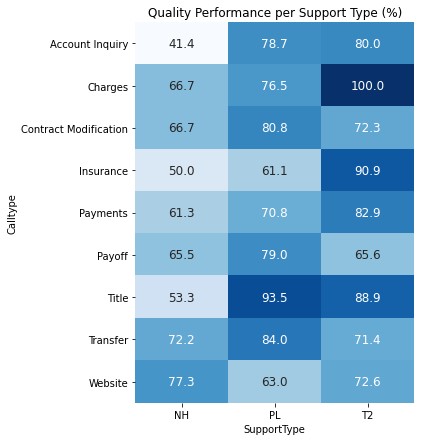

In [420]:
fig = plt.figure(figsize=(5,7))
ax = fig.add_subplot(111)


sns.heatmap(agg_data.groupby(["Calltype", "SupportType"])["QAEvaluation"].mean().unstack().transform(lambda x: (x*100)),
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1f",
            annot_kws={"fontsize":12},
            ax = ax
           )

ax.set_title("Quality Performance per Support Type (%)");

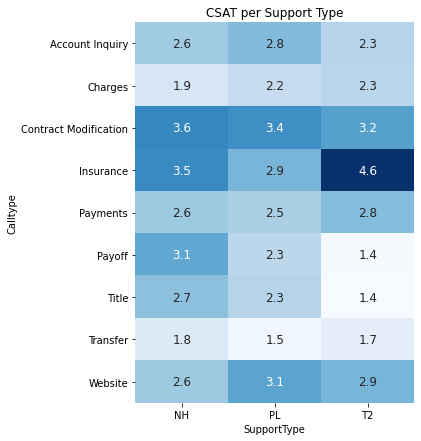

In [421]:
fig = plt.figure(figsize=(5,7))
ax = fig.add_subplot(111)


sns.heatmap(agg_data.groupby(["Calltype", "SupportType"])["CSAT"].mean().unstack(),
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1f",
            annot_kws={"fontsize":12},
            ax = ax
           )

ax.set_title("CSAT per Support Type");

### Duration per Tier

In [425]:
get = DF_STRATIFICATION[["AgentScorecardID","Calltype","SupportType","Duration"]]
get = get.groupby(["AgentScorecardID", "Calltype", "SupportType"])["Duration"].agg(["count","sum"]).reset_index()

In [426]:
get

,AgentScorecardID,Calltype,SupportType,count,sum
0,32817,Payments,PL,6,277
1,32821,Payments,PL,8,268
2,32838,Payments,NH,15,204
3,32844,Payoff,NH,30,537
4,32846,Payments,NH,7,255
...,...,...,...,...,...
1326,46979,Payoff,PL,15,1135
1327,46980,Payoff,T2,9,1806
1328,46984,Website,T2,24,230
1329,46985,Insurance,PL,14,1013


In [427]:
get.groupby(["Calltype","SupportType"])["sum"].agg(["count", "median", np.std, "min", "max"]).xs("NH", level=1)

,count,median,std,min,max
Calltype,,,,,
Account Inquiry,29,282.0,189.353105,80,972
Charges,9,351.0,163.568878,109,645
Contract Modification,27,438.0,277.059427,156,1113
Insurance,8,498.0,193.974962,236,734
Payments,62,290.0,183.360305,120,901
Payoff,29,359.0,159.660948,153,809
Title,15,321.0,242.654036,169,1156
Transfer,36,287.0,186.788489,199,1021
Website,22,367.0,269.270025,137,1107


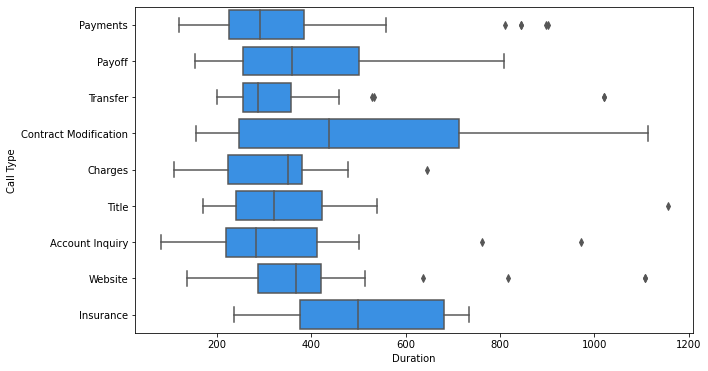

In [428]:
query = get[get["SupportType"] == "NH"]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


sns.boxplot(x = "sum",
            y = "Calltype",
            data = query,
            color = "dodgerblue",
            orient= "h",
            ax=ax
           )

plt.xlabel("Duration")
plt.ylabel("Call Type");

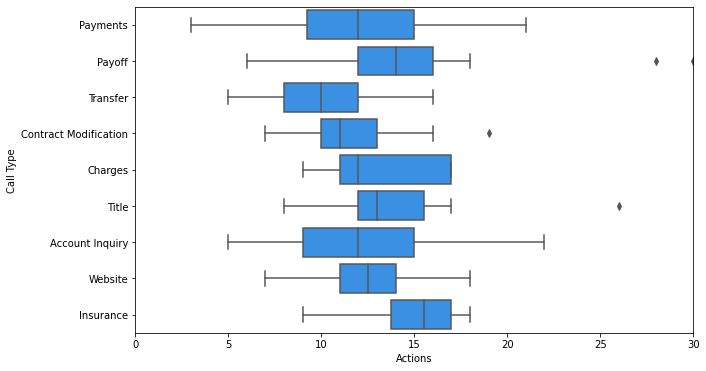

In [429]:
query = get[get["SupportType"] == "NH"]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


sns.boxplot(x = "count",
            y = "Calltype",
            data = query,
            color = "dodgerblue",
            orient= "h",
            ax=ax
           )

plt.xlim(0,30)
plt.xlabel("Actions")
plt.ylabel("Call Type");

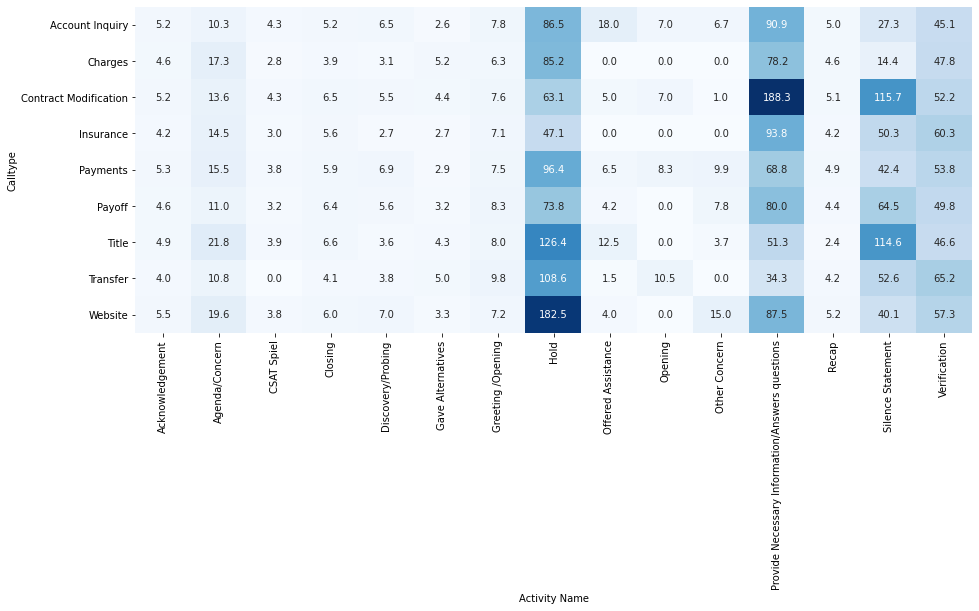

In [441]:
query = DF_STRATIFICATION[DF_STRATIFICATION["SupportType"] == "NH"][["Calltype", "Activity Name", "Duration"]]
query = query.pivot_table(values="Duration",
                          index="Calltype",
                          columns="Activity Name",
                          aggfunc="mean"
                         ).fillna(0)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

sns.heatmap(query,
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1f"
           )

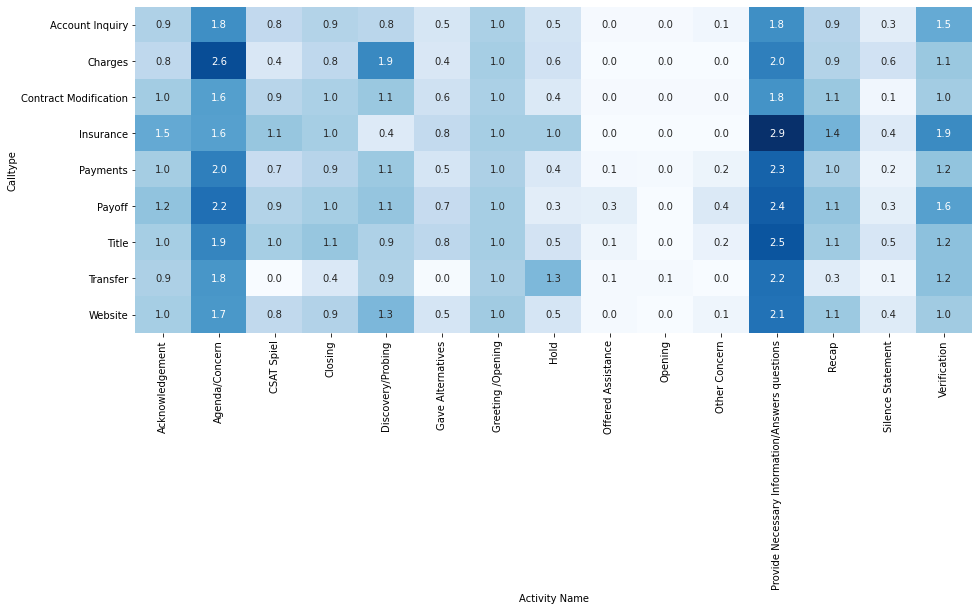

In [442]:
query = DF_STRATIFICATION[DF_STRATIFICATION["SupportType"] == "NH"][["Calltype", "Activity Name", "Duration"]]
query = query.pivot_table(values="Duration",
                          index="Calltype",
                          columns="Activity Name",
                          aggfunc="count"
                         ).fillna(0)

query = query.div(get.groupby(["Calltype","SupportType"])["sum"].agg(["count", "median", np.std, "min", "max"]).xs("NH", level=1)["count"].values,
                  axis=0
                 )

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

sns.heatmap(query,
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1%"
           )

### PL

In [430]:
get.groupby(["Calltype","SupportType"])["sum"].agg(["count", "median", np.std, "min", "max"]).xs("PL", level=1)

,count,median,std,min,max
Calltype,,,,,
Account Inquiry,47,211.0,219.613261,90,988
Charges,17,328.0,216.488775,138,1029
Contract Modification,52,397.5,195.935066,163,973
Insurance,18,317.5,273.901925,151,1078
Payments,168,257.0,168.477472,112,1044
Payoff,62,285.0,213.338793,144,1135
Title,46,398.5,269.577498,148,1335
Transfer,100,274.5,232.261769,74,1666
Website,54,340.5,241.241543,129,1290


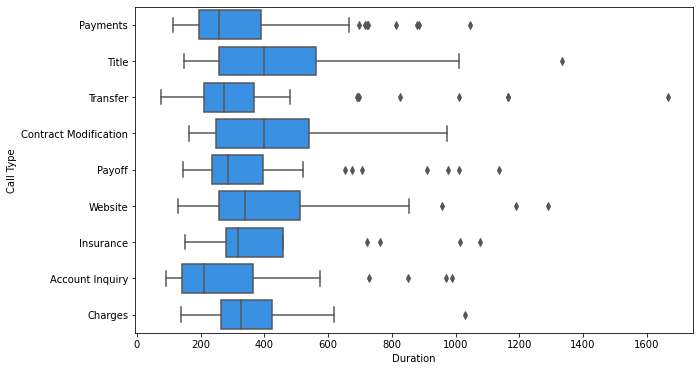

In [431]:
query = get[get["SupportType"] == "PL"]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


sns.boxplot(x = "sum",
            y = "Calltype",
            data = query,
            color = "dodgerblue",
            orient= "h",
            ax=ax
           )

plt.xlabel("Duration")
plt.ylabel("Call Type");

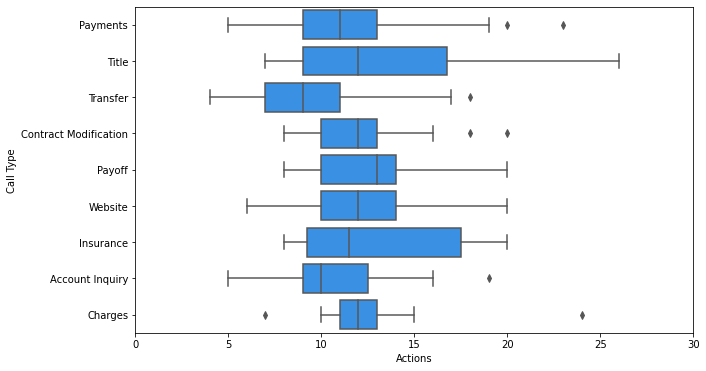

In [432]:
query = get[get["SupportType"] == "PL"]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


sns.boxplot(x = "count",
            y = "Calltype",
            data = query,
            color = "dodgerblue",
            orient= "h",
            ax=ax
           )

plt.xlim(0,30)
plt.xlabel("Actions")
plt.ylabel("Call Type");

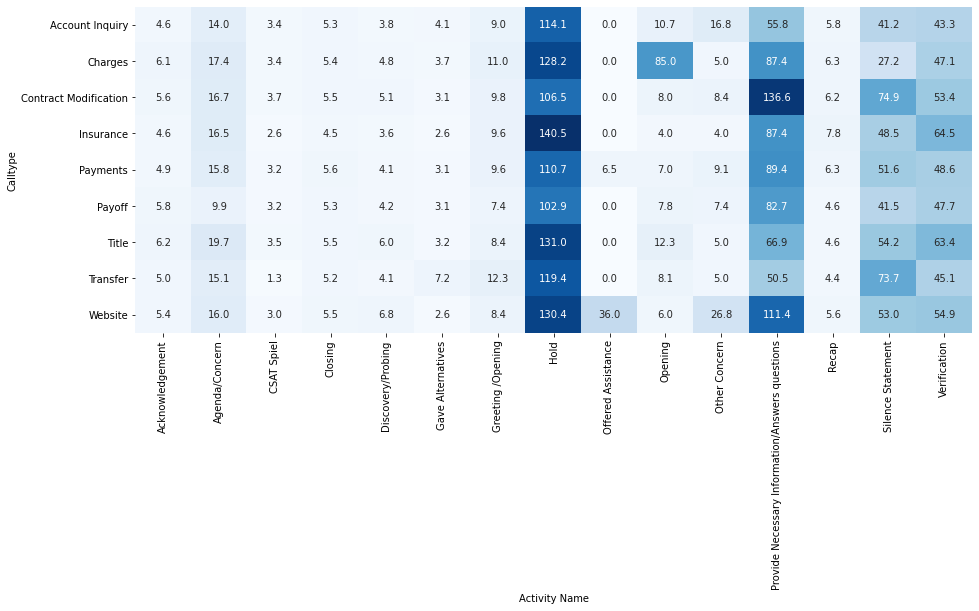

In [439]:
query = DF_STRATIFICATION[DF_STRATIFICATION["SupportType"] == "PL"][["Calltype", "Activity Name", "Duration"]]
query = query.pivot_table(values="Duration",
                          index="Calltype",
                          columns="Activity Name",
                          aggfunc="mean"
                         ).fillna(0)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

sns.heatmap(query,
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1f"
           )

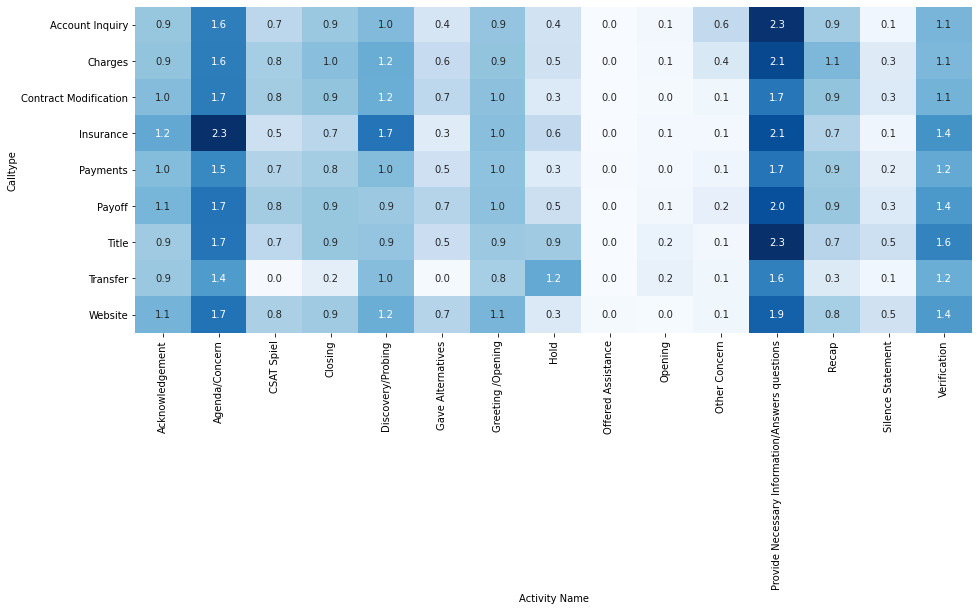

In [440]:
query = DF_STRATIFICATION[DF_STRATIFICATION["SupportType"] == "PL"][["Calltype", "Activity Name", "Duration"]]
query = query.pivot_table(values="Duration",
                          index="Calltype",
                          columns="Activity Name",
                          aggfunc="count"
                         ).fillna(0)

query = query.div(get.groupby(["Calltype","SupportType"])["sum"].agg(["count", "median", np.std, "min", "max"]).xs("PL", level=1)["count"].values,
                  axis=0
                 )

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

sns.heatmap(query,
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1%"
           )

### Tier 2

In [433]:
get.groupby(["Calltype","SupportType"])["sum"].agg(["count", "median", np.std, "min", "max"]).xs("T2", level=1)

,count,median,std,min,max
Calltype,,,,,
Account Inquiry,45,245.0,248.056123,42,1230
Charges,13,459.0,427.212897,250,1856
Contract Modification,47,604.0,469.378744,199,2680
Insurance,11,973.0,412.502848,261,1627
Payments,140,355.5,328.949865,86,1524
Payoff,61,507.0,421.307247,140,1806
Title,45,325.0,287.820569,77,1334
Transfer,84,311.0,217.825611,107,1230
Website,84,322.0,351.106911,123,2092


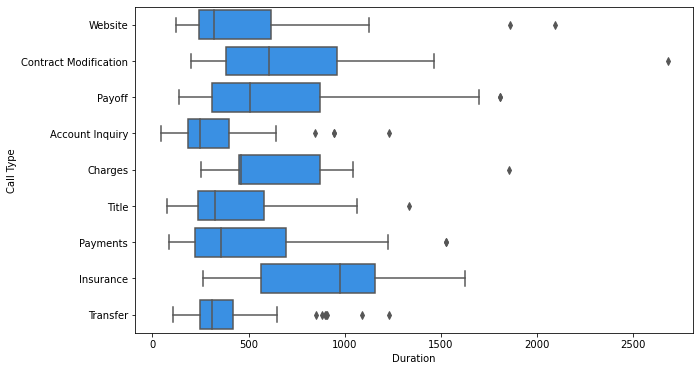

In [434]:
query = get[get["SupportType"] == "T2"]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


sns.boxplot(x = "sum",
            y = "Calltype",
            data = query,
            color = "dodgerblue",
            orient= "h",
            ax=ax
           )

plt.xlabel("Duration")
plt.ylabel("Call Type");

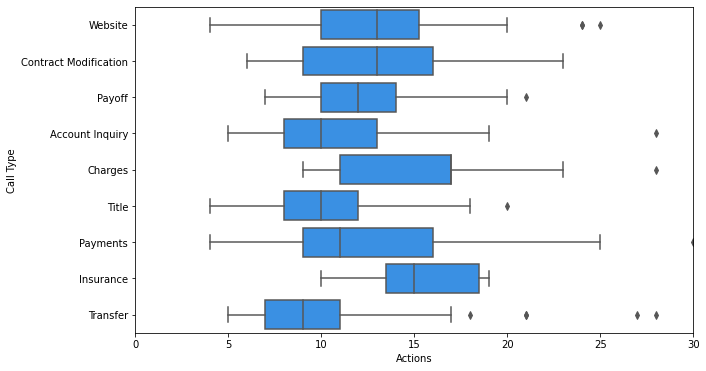

In [435]:
query = get[get["SupportType"] == "T2"]

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)


sns.boxplot(x = "count",
            y = "Calltype",
            data = query,
            color = "dodgerblue",
            orient= "h",
            ax=ax
           )

plt.xlim(0,30)
plt.xlabel("Actions")
plt.ylabel("Call Type");

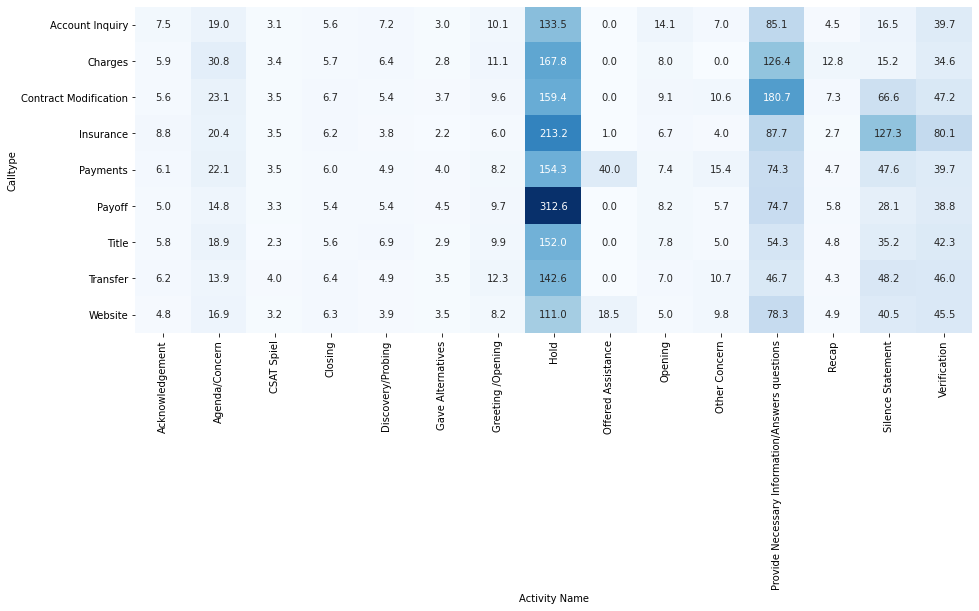

In [436]:
query = DF_STRATIFICATION[DF_STRATIFICATION["SupportType"] == "T2"][["Calltype", "Activity Name", "Duration"]]
query = query.pivot_table(values="Duration",
                          index="Calltype",
                          columns="Activity Name",
                          aggfunc="mean"
                         ).fillna(0)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

sns.heatmap(query,
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1f"
           )

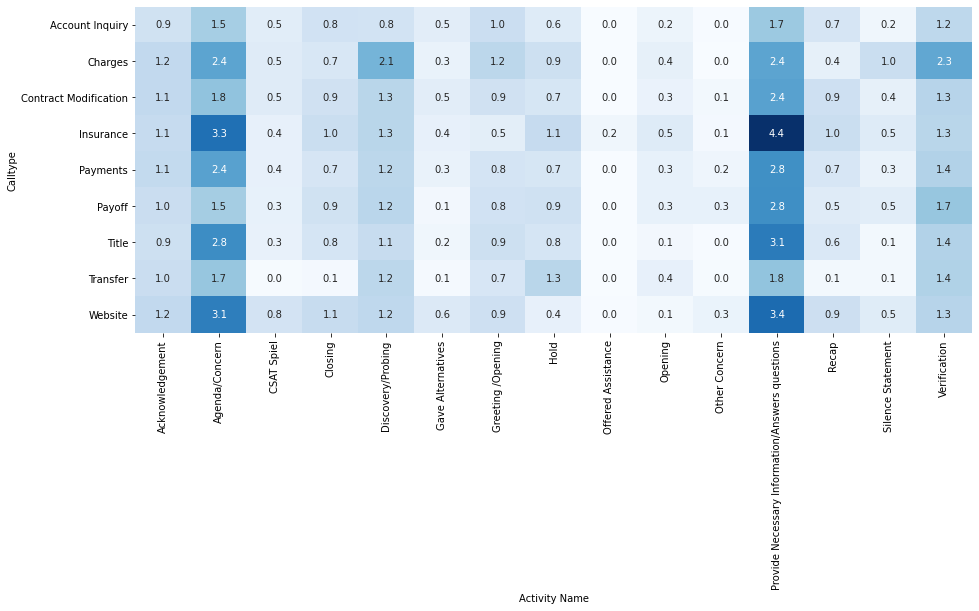

In [438]:
query = DF_STRATIFICATION[DF_STRATIFICATION["SupportType"] == "T2"][["Calltype", "Activity Name", "Duration"]]
query = query.pivot_table(values="Duration",
                          index="Calltype",
                          columns="Activity Name",
                          aggfunc="count"
                         ).fillna(0)

query = query.div(get.groupby(["Calltype","SupportType"])["sum"].agg(["count", "median", np.std, "min", "max"]).xs("T2", level=1)["count"].values,
                  axis=0
                 )

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

sns.heatmap(query,
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1%"
           )

In [444]:
def get_history(Zipped_Series):
    
    collector = []
    previous_state = ""
    
    for a,b in Zipped_Series:
        if a == 1:
            collector.append("Start")
            previous_state = b
        else:
            collector.append(previous_state)
            previous_state = b
    
    return pd.Series(collector)

In [445]:
DF_STRATIFICATION["Prev_Activity"] = get_history(zip(DF_STRATIFICATION["ActivityOrder"], DF_STRATIFICATION["Activity Name"]))

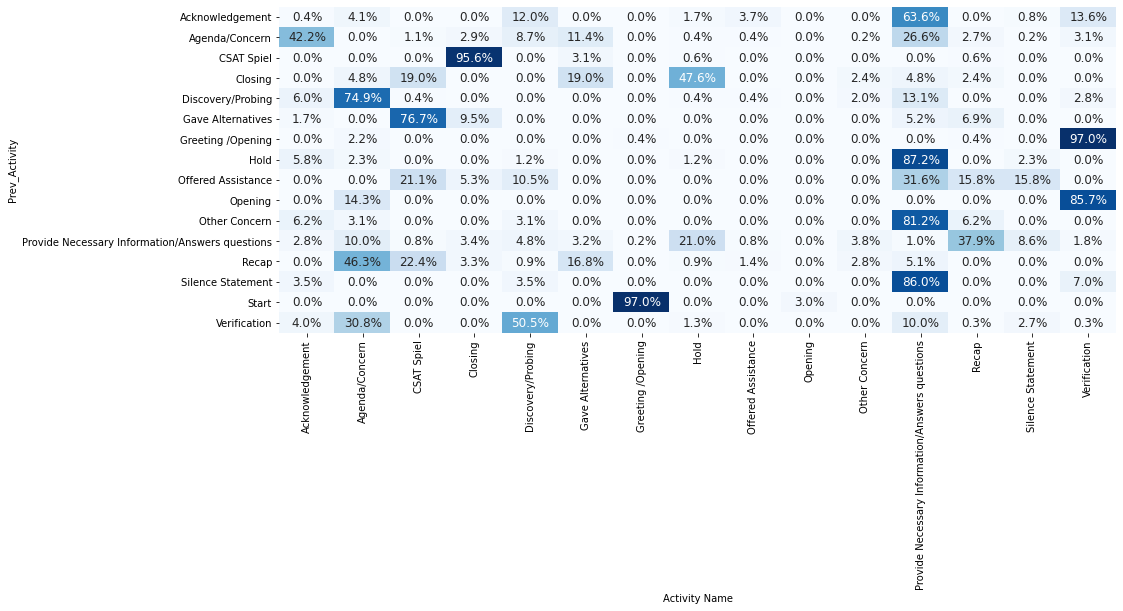

In [465]:
query = DF_STRATIFICATION[DF_STRATIFICATION["SupportType"] == "NH"][["Prev_Activity", "Activity Name", "Duration"]]
activity_tracker = pd.pivot_table(query, index="Prev_Activity", columns="Activity Name",
                                  values="Duration", aggfunc="count"
                                 ).fillna(0).astype(int)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

sns.heatmap(activity_tracker.div(activity_tracker.sum(axis=1),axis=0),
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1%",
            annot_kws={"fontsize":12}
           );

In [466]:
DF_STRATIFICATION["SupportType"].value_counts()

T2    6907
PL    6436
NH    2942
Name: SupportType, dtype: int64

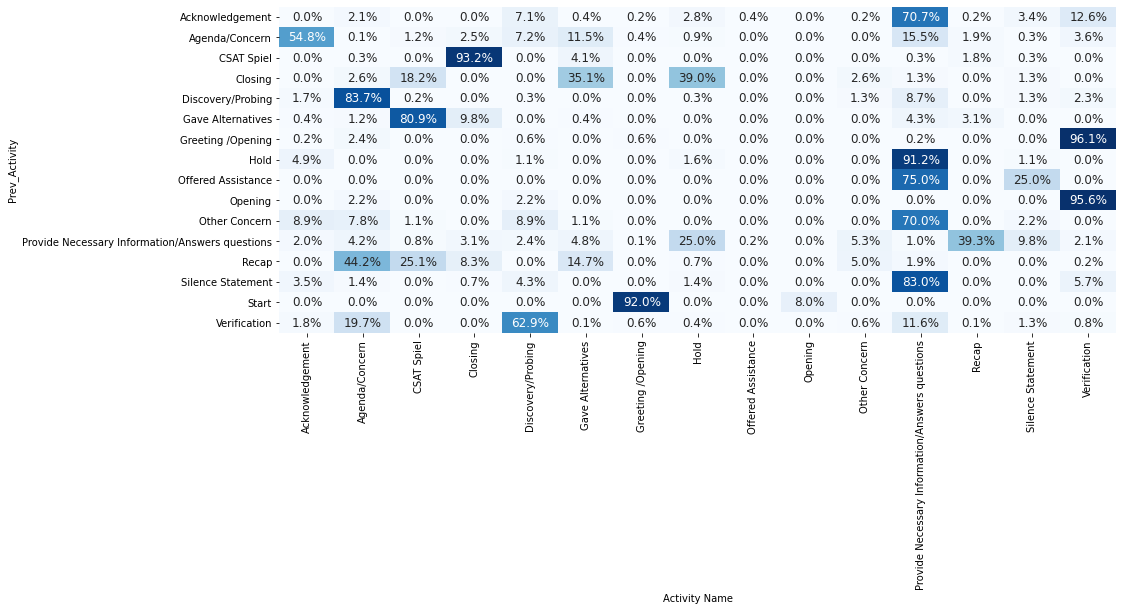

In [467]:
query = DF_STRATIFICATION[DF_STRATIFICATION["SupportType"] == "PL"][["Prev_Activity", "Activity Name", "Duration"]]
activity_tracker = pd.pivot_table(query, index="Prev_Activity", columns="Activity Name",
                                  values="Duration", aggfunc="count"
                                 ).fillna(0).astype(int)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

sns.heatmap(activity_tracker.div(activity_tracker.sum(axis=1),axis=0),
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1%",
            annot_kws={"fontsize":12}
           );

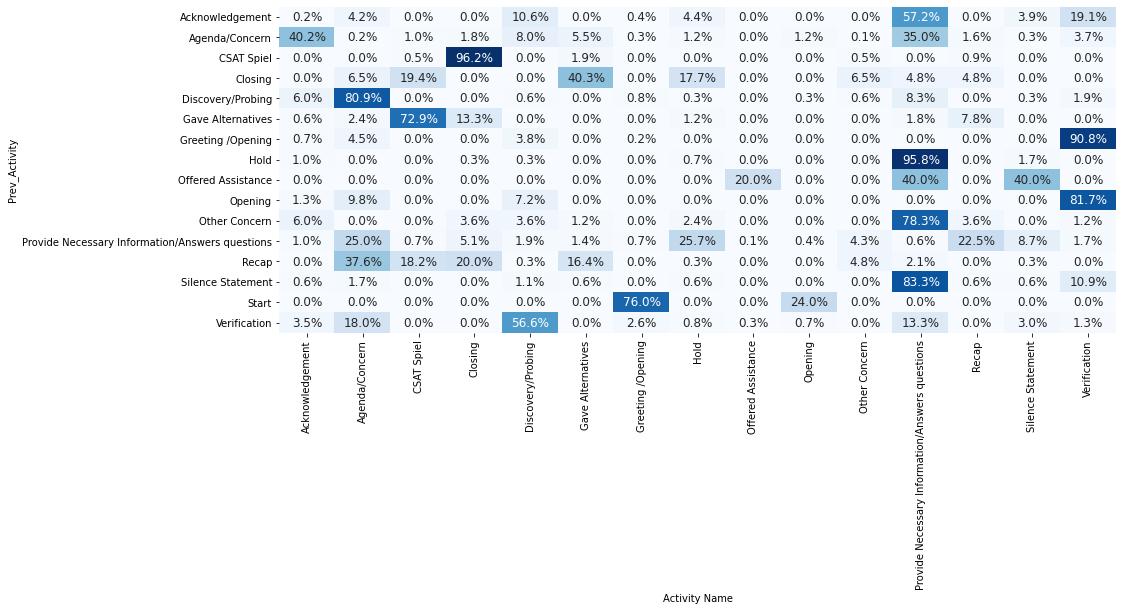

In [468]:
query = DF_STRATIFICATION[DF_STRATIFICATION["SupportType"] == "T2"][["Prev_Activity", "Activity Name", "Duration"]]
activity_tracker = pd.pivot_table(query, index="Prev_Activity", columns="Activity Name",
                                  values="Duration", aggfunc="count"
                                 ).fillna(0).astype(int)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

sns.heatmap(activity_tracker.div(activity_tracker.sum(axis=1),axis=0),
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1%",
            annot_kws={"fontsize":12}
           );

#### All Tiers but seeking which has the best performance given the following KPIs:
- Quality = Pass
- CSAT = Highest value (3)

In [469]:
DF_STRATIFICATION

,AgentScorecardID,Activity Name,StartTime,EndTime,Duration,CountVar,CreatedDate,ActivityOrder,ScorecardName,Active,CSAT,TotalTenureDays,CallMaturity,QAEvaluation,Autofail,Tenure_Bin,Calltype,SupportType,Prev_Activity
0,32817,Greeting /Opening,00:00:00,00:00:09,9,1,2020-01-07 04:37:09,1,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL,Start
1,32817,Verification,00:00:09,00:01:18,69,1,2020-01-07 04:37:09,2,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL,Greeting /Opening
2,32817,Discovery/Probing,00:01:18,00:01:21,3,1,2020-01-07 04:37:09,3,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL,Verification
3,32817,Agenda/Concern,00:01:21,00:01:39,18,1,2020-01-07 04:37:09,4,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL,Discovery/Probing
4,32817,Acknowledgement,00:01:39,00:01:43,4,1,2020-01-07 04:37:09,5,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL,Agenda/Concern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16280,46999,Provide Necessary Information/Answers questions,00:15:16,00:15:22,6,23,2020-05-01 00:14:55,54,Ally Care V-02-2020,True,4,817,3.0,0,0,> 365 Days,Payments,T2,Agenda/Concern
16281,46999,Agenda/Concern,00:15:22,00:15:23,1,23,2020-05-01 00:14:55,55,Ally Care V-02-2020,True,4,817,3.0,0,0,> 365 Days,Payments,T2,Provide Necessary Information/Answers questions
16282,46999,Recap,00:15:23,00:15:29,6,1,2020-05-01 00:14:55,56,Ally Care V-02-2020,True,4,817,3.0,0,0,> 365 Days,Payments,T2,Agenda/Concern
16283,46999,Agenda/Concern,00:15:29,00:15:31,2,24,2020-05-01 00:14:55,57,Ally Care V-02-2020,True,4,817,3.0,0,0,> 365 Days,Payments,T2,Recap


#### Passing in QA

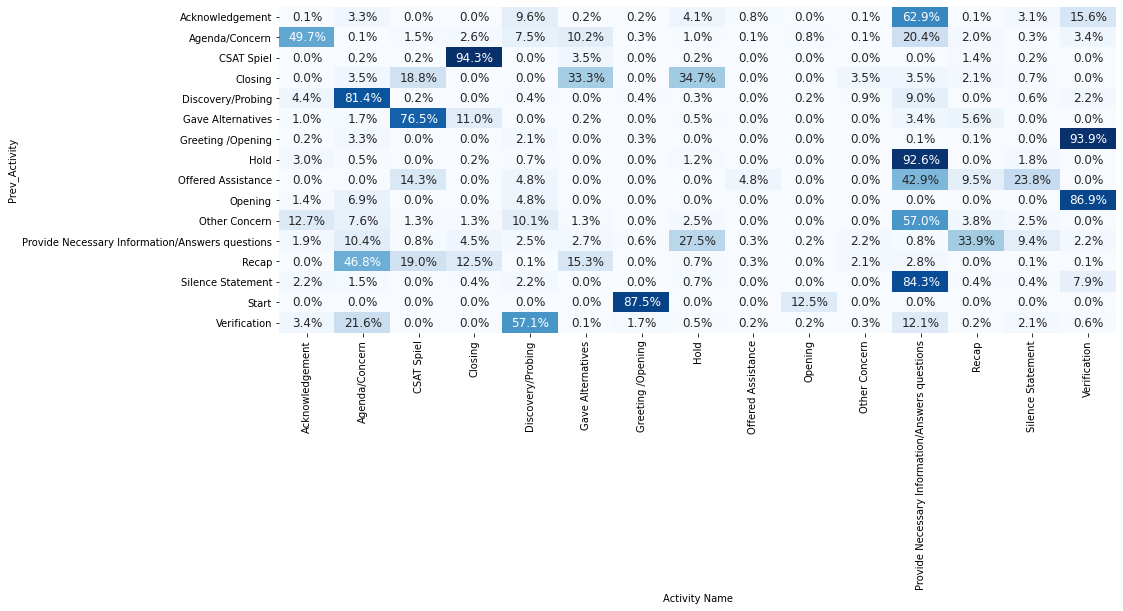

In [476]:
query = DF_STRATIFICATION[DF_STRATIFICATION["QAEvaluation"] == 1][["Prev_Activity", "Activity Name", "Duration"]]
activity_tracker = pd.pivot_table(query, index="Prev_Activity", columns="Activity Name",
                                  values="Duration", aggfunc="count"
                                 ).fillna(0).astype(int)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

sns.heatmap(activity_tracker.div(activity_tracker.sum(axis=1),axis=0),
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1%",
            annot_kws={"fontsize":12}
           );

#### Failing in QA

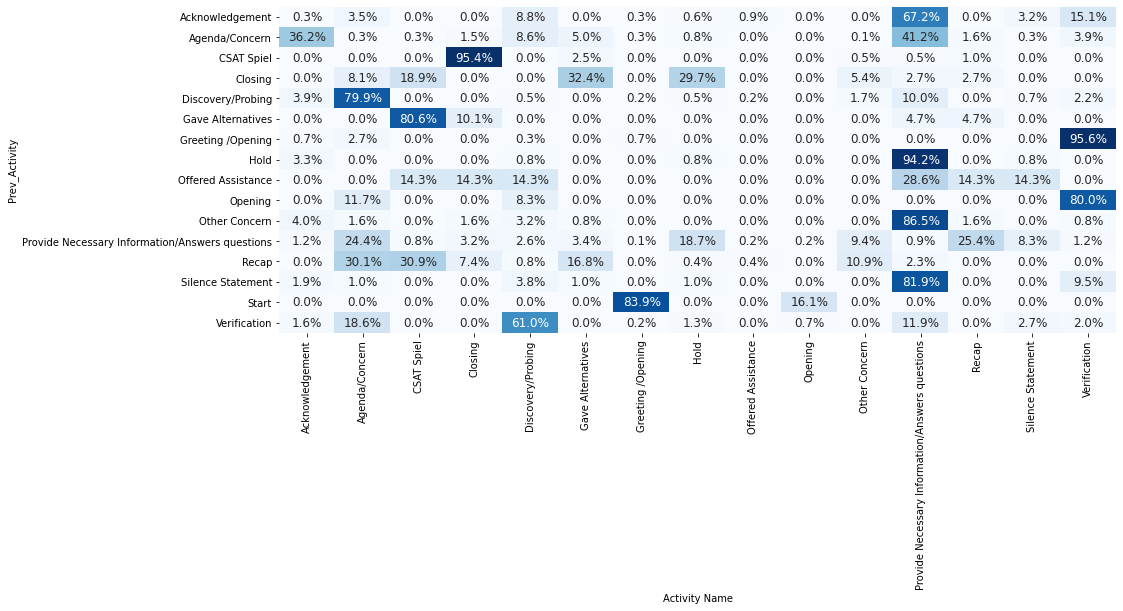

In [477]:
query = DF_STRATIFICATION[DF_STRATIFICATION["QAEvaluation"] == 0][["Prev_Activity", "Activity Name", "Duration"]]
activity_tracker = pd.pivot_table(query, index="Prev_Activity", columns="Activity Name",
                                  values="Duration", aggfunc="count"
                                 ).fillna(0).astype(int)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(111)

sns.heatmap(activity_tracker.div(activity_tracker.sum(axis=1),axis=0),
            cmap="Blues",
            cbar=False,
            annot=True,
            fmt=".1%",
            annot_kws={"fontsize":12}
           );

In [474]:
DF_STRATIFICATION

,AgentScorecardID,Activity Name,StartTime,EndTime,Duration,CountVar,CreatedDate,ActivityOrder,ScorecardName,Active,CSAT,TotalTenureDays,CallMaturity,QAEvaluation,Autofail,Tenure_Bin,Calltype,SupportType,Prev_Activity
0,32817,Greeting /Opening,00:00:00,00:00:09,9,1,2020-01-07 04:37:09,1,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL,Start
1,32817,Verification,00:00:09,00:01:18,69,1,2020-01-07 04:37:09,2,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL,Greeting /Opening
2,32817,Discovery/Probing,00:01:18,00:01:21,3,1,2020-01-07 04:37:09,3,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL,Verification
3,32817,Agenda/Concern,00:01:21,00:01:39,18,1,2020-01-07 04:37:09,4,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL,Discovery/Probing
4,32817,Acknowledgement,00:01:39,00:01:43,4,1,2020-01-07 04:37:09,5,Ally Care V-01-2020,True,1,1255,2.0,0,0,> 365 Days,Payments,PL,Agenda/Concern
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16280,46999,Provide Necessary Information/Answers questions,00:15:16,00:15:22,6,23,2020-05-01 00:14:55,54,Ally Care V-02-2020,True,4,817,3.0,0,0,> 365 Days,Payments,T2,Agenda/Concern
16281,46999,Agenda/Concern,00:15:22,00:15:23,1,23,2020-05-01 00:14:55,55,Ally Care V-02-2020,True,4,817,3.0,0,0,> 365 Days,Payments,T2,Provide Necessary Information/Answers questions
16282,46999,Recap,00:15:23,00:15:29,6,1,2020-05-01 00:14:55,56,Ally Care V-02-2020,True,4,817,3.0,0,0,> 365 Days,Payments,T2,Agenda/Concern
16283,46999,Agenda/Concern,00:15:29,00:15:31,2,24,2020-05-01 00:14:55,57,Ally Care V-02-2020,True,4,817,3.0,0,0,> 365 Days,Payments,T2,Recap


In [ ]:
fig, ax = plt.subplots(1, 1)